In [1]:
import numpy as np
import pandas as pd

import matplotlib
import matplotlib.image as img
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
DATASET_PATH = 'C:/Temp/files/GeekBrains/ds_python_libs/final/train.csv'
TEST_PATH = 'C:/Temp/files/GeekBrains/ds_python_libs/final/test.csv'

**File descriptions**

* train.csv - the training set
* test.csv - the test set
* sampleSubmission.csv - a sample submission file in the correct format

**Data fields**
* Id - идентификационный номер квартиры
* DistrictId - идентификационный номер района
* Rooms - количество комнат
* Square - площадь
* LifeSquare - жилая площадь
* KitchenSquare - площадь кухни
* Floor - этаж
* HouseFloor - количество этажей в доме
* HouseYear - год постройки дома
* Ecology_1, Ecology_2, Ecology_3 - экологические показатели местности
* Social_1, Social_2, Social_3 - социальные показатели местности
* Healthcare_1, Helthcare_2 - показатели местности, связанные с охраной здоровья
* Shops_1, Shops_2 - показатели, связанные с наличием магазинов, торговых центров
* Price - цена квартиры

## Read data

In [3]:
df = pd.read_csv(DATASET_PATH)
df.head(5)

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price
0,14038,35,2.0,47.981561,29.442751,6.0,7,9.0,1969,0.089040,B,B,33,7976,5,NaN,0,11,B,184966.930730
1,15053,41,3.0,65.683640,40.049543,8.0,7,9.0,1978,0.000070,B,B,46,10309,1,240.0,1,16,B,300009.450063
2,4765,53,2.0,44.947953,29.197612,0.0,8,12.0,1968,0.049637,B,B,34,7759,0,229.0,1,3,B,220925.908524
3,5809,58,2.0,53.352981,52.731512,9.0,8,17.0,1977,0.437885,B,B,23,5735,3,1084.0,0,5,B,175616.227217
4,10783,99,1.0,39.649192,23.776169,7.0,11,12.0,1976,0.012339,B,B,35,5776,1,2078.0,2,4,B,150226.531644


In [4]:
X_test = pd.read_csv(TEST_PATH)
y_test = pd.DataFrame()
y_test['Id'] = X_test['Id'].copy()
X_test.set_index('Id', inplace = True)

In [5]:
y = pd.DataFrame(df['Price'], columns = ['Price'])
X = df.drop('Price', axis = 1)
X.set_index('Id', inplace = True)

In [6]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 14038 to 6306
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   DistrictId     10000 non-null  int64  
 1   Rooms          10000 non-null  float64
 2   Square         10000 non-null  float64
 3   LifeSquare     7887 non-null   float64
 4   KitchenSquare  10000 non-null  float64
 5   Floor          10000 non-null  int64  
 6   HouseFloor     10000 non-null  float64
 7   HouseYear      10000 non-null  int64  
 8   Ecology_1      10000 non-null  float64
 9   Ecology_2      10000 non-null  object 
 10  Ecology_3      10000 non-null  object 
 11  Social_1       10000 non-null  int64  
 12  Social_2       10000 non-null  int64  
 13  Social_3       10000 non-null  int64  
 14  Healthcare_1   5202 non-null   float64
 15  Helthcare_2    10000 non-null  int64  
 16  Shops_1        10000 non-null  int64  
 17  Shops_2        10000 non-null  object 
dtypes: 

In [7]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5000 entries, 725 to 12504
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   DistrictId     5000 non-null   int64  
 1   Rooms          5000 non-null   float64
 2   Square         5000 non-null   float64
 3   LifeSquare     3959 non-null   float64
 4   KitchenSquare  5000 non-null   float64
 5   Floor          5000 non-null   int64  
 6   HouseFloor     5000 non-null   float64
 7   HouseYear      5000 non-null   int64  
 8   Ecology_1      5000 non-null   float64
 9   Ecology_2      5000 non-null   object 
 10  Ecology_3      5000 non-null   object 
 11  Social_1       5000 non-null   int64  
 12  Social_2       5000 non-null   int64  
 13  Social_3       5000 non-null   int64  
 14  Healthcare_1   2623 non-null   float64
 15  Helthcare_2    5000 non-null   int64  
 16  Shops_1        5000 non-null   int64  
 17  Shops_2        5000 non-null   object 
dtypes: fl

In [8]:
tech_square = np.around((X['Square'] - X['LifeSquare'] - X['KitchenSquare']), decimals = 0).mode()[0]
tech_square

11.0

In [9]:
print(f"LifeSquare X_test Nan: {X_test['LifeSquare'].isna().sum()/len(X_test['LifeSquare'])}")
print(f"LifeSquare X Nan: {X['LifeSquare'].isna().sum()/len(X['LifeSquare'])}")

LifeSquare X_test Nan: 0.2082
LifeSquare X Nan: 0.2113


In [10]:
print(f"LifeSquare X_test bad values: {sum(X_test['LifeSquare'].isna() | (X_test['Square'] < X_test['LifeSquare'] + X_test['KitchenSquare'] + tech_square))/len(X_test['LifeSquare'])}")
print(f"LifeSquare X bad values: {sum(X['LifeSquare'].isna() | (X['Square'] < X['LifeSquare'] + X['KitchenSquare'] + tech_square))/len(X['LifeSquare'])}")

LifeSquare X_test bad values: 0.5824
LifeSquare X bad values: 0.585


In [11]:
#LifeSquare may be removed

In [12]:
print(f"Healthcare_1 X_test Nan: {X_test['Healthcare_1'].isna().sum()/len(X_test['Healthcare_1'])}")
print(f"Healthcare_1 X Nan: {X['Healthcare_1'].isna().sum()/len(X['Healthcare_1'])}")

Healthcare_1 X_test Nan: 0.4754
Healthcare_1 X Nan: 0.4798


In [13]:
#Healthcare_1 will be removed

In [14]:
X.describe()

,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1
count,10000.000000,10000.000000,10000.000000,7887.000000,10000.000000,10000.000000,10000.000000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,5202.000000,10000.000000,10000.000000
mean,50.400800,1.890500,56.315775,37.199645,6.273300,8.526700,12.609400,3.990166e+03,0.118858,24.687000,5352.157400,8.039200,1142.904460,1.319500,4.231300
std,43.587592,0.839512,21.058732,86.241209,28.560917,5.241148,6.775974,2.005003e+05,0.119025,17.532614,4006.799803,23.831875,1021.517264,1.493601,4.806341
min,0.000000,0.000000,1.136859,0.370619,0.000000,1.000000,0.000000,1.910000e+03,0.000000,0.000000,168.000000,0.000000,0.000000,0.000000,0.000000
25%,20.000000,1.000000,41.774881,22.769832,1.000000,4.000000,9.000000,1.974000e+03,0.017647,6.000000,1564.000000,0.000000,350.000000,0.000000,1.000000
50%,36.000000,2.000000,52.513310,32.781260,6.000000,7.000000,13.000000,1.977000e+03,0.075424,25.000000,5285.000000,2.000000,900.000000,1.000000,3.000000
75%,75.000000,2.000000,65.900625,45.128803,9.000000,12.000000,17.000000,2.001000e+03,0.195781,36.000000,7227.000000,5.000000,1548.000000,2.000000,6.000000
max,209.000000,19.000000,641.065193,7480.592129,2014.000000,42.000000,117.000000,2.005201e+07,0.521867,74.000000,19083.000000,141.000000,4849.000000,6.000000,23.000000


## EDA

#### price

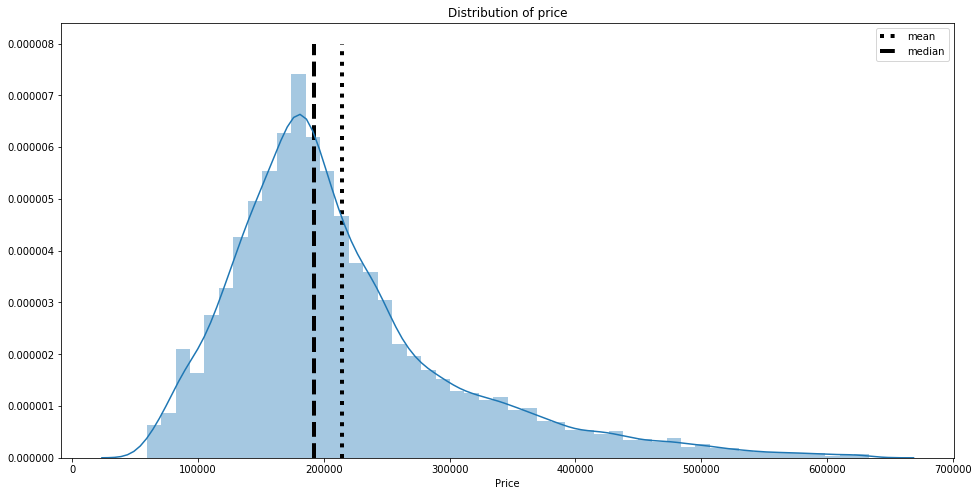

In [15]:
fig, ax = plt.subplots(figsize = (16, 8))
sns.distplot(y['Price'])
ax.vlines(y['Price'].mean(), 0, 0.000008, label='mean', linestyle=':', linewidth=4)
ax.vlines(y['Price'].median(), 0, 0.000008, label='median', linestyle='--', linewidth=4)

plt.title('Distribution of price')
plt.legend()
plt.show()

#### outs

In [16]:
quant_features = ['Rooms', 'Square', 'LifeSquare', 'KitchenSquare', 'Floor',
       'HouseFloor', 'HouseYear', 'Ecology_1', 'Social_1', 'Social_2', 'Social_3', 'Helthcare_2',
       'Shops_1']
bin_features = ['Ecology_2', 'Ecology_3', 'Shops_2']

In [17]:
pure_metrics = X.loc[:, quant_features].describe().loc[['mean', 'std']]
pure_metrics.T

,mean,std
Rooms,1.890500,0.839512
Square,56.315775,21.058732
LifeSquare,37.199645,86.241209
KitchenSquare,6.273300,28.560917
Floor,8.526700,5.241148
HouseFloor,12.609400,6.775974
HouseYear,3990.166300,200500.261427
Ecology_1,0.118858,0.119025
Social_1,24.687000,17.532614
Social_2,5352.157400,4006.799803


In [18]:
def outs(feature):
    bot = X.loc[:, quant_features].boxplot(column = [feature], return_type = 'dict')['caps'][0].get_ydata()[0]
    top = X.loc[:, quant_features].boxplot(column = [feature], return_type = 'dict')['caps'][1].get_ydata()[0]
    med = X.loc[:, quant_features].boxplot(column = [feature], return_type = 'dict')['medians'][0].get_ydata()[1]
    part = len(X.loc[:, quant_features][feature][(X.loc[:, quant_features][feature] > top) | (X.loc[:, quant_features][feature] < bot)])/len(X.loc[:, quant_features][feature])
    return {'bot': bot, 'med': med, 'top': top, 'part': part}


,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Social_1,Social_2,Social_3,Helthcare_2,Shops_1
bot,0.0000,13.784865,0.370619,0.0000,1.0000,0.0000,1934.0000,0.000000,0.0,168.0000,0.0000,0.0000,0.0000
med,2.0000,52.513310,32.781260,6.0000,7.0000,13.0000,1977.0000,0.075424,25.0,5285.0000,2.0000,1.0000,3.0000
top,3.0000,102.056968,78.651539,21.0000,24.0000,29.0000,2020.0000,0.460556,74.0,14892.0000,11.0000,5.0000,11.0000
part,0.0172,0.024200,0.024000,0.0047,0.0066,0.0049,0.0038,0.006100,0.0,0.0176,0.0862,0.0099,0.0553


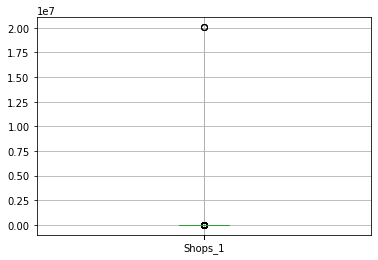

In [19]:
feature_out = pd.DataFrame({col: outs(col) for col in X.loc[:, quant_features].columns})
feature_out

#### ToDo
* выбросы меняем на медиану. 
* если floor > house floor, то заменяем floor на house floor
* удаляем Healthcare_1
* nan LifeSquare = Square - KitchenSquare - tech_square
* eсли общая площадь меньше суммы жилой и кухни, то LifeSquare = Square - KitchenSquare

### 1. Clear outs

In [20]:
def clear_outs(X):
    for col in X.loc[:, quant_features].columns:
        X.loc[(X[col] > feature_out[col]['top']) | (X[col] < feature_out[col]['bot']), col] = feature_out[col]['med']


    X.loc[X['Floor'] > X['HouseFloor'], 'Floor'] = X.loc[X['Floor'] > X['HouseFloor'], 'HouseFloor']
    if 'Healthcare_1' in X.columns:
        X.drop('Healthcare_1', axis=1, inplace=True)
    X.loc[X['LifeSquare'].isna(), 'LifeSquare'] = X.loc[X['LifeSquare'].isna(), 'Square'] - X.loc[X['LifeSquare'].isna(), 'KitchenSquare'] - tech_square
    X.loc[X['Square'] < X['LifeSquare'] + X['KitchenSquare'], 'LifeSquare'] = X.loc[X['Square'] < X['LifeSquare'] + X['KitchenSquare'], 'Square'] - X.loc[X['Square'] < X['LifeSquare'] + X['KitchenSquare'], 'KitchenSquare']
    return X

In [21]:
X = clear_outs(X)
X_test = clear_outs(X_test)

In [22]:
# from sklearn.experimental import enable_iterative_imputer  
# from sklearn.impute import IterativeImputer
# imputer = IterativeImputer(max_iter=100)

In [23]:
# def fill_nan(X):
#     imp_arr = pd.DataFrame(imputer.fit_transform(X.loc[:, quant_features]), index = X.index.copy())
#     imp_arr.columns = X.loc[:, quant_features].columns
#     X = pd.concat([imp_arr, X.loc[:, bin_features]], axis = 1)
#     return X

In [24]:
# X = fill_nan(X)
# X_test = fill_nan(X_test)
# X

In [25]:
clear_metrics = X.loc[:, quant_features].describe().loc[['mean', 'std']]
pure_metrics.T.join(clear_metrics.T, lsuffix = '_pure', rsuffix = '_tidy')

,mean_pure,std_pure,mean_tidy,std_tidy
Rooms,1.890500,0.839512,1.851400,0.758403
Square,56.315775,21.058732,54.654781,15.859586
LifeSquare,37.199645,86.241209,36.089502,14.687973
KitchenSquare,6.273300,28.560917,5.677200,3.877667
Floor,8.526700,5.241148,7.595200,5.121226
HouseFloor,12.609400,6.775974,12.481500,6.395479
HouseYear,3990.166300,200500.261427,1985.052600,18.050225
Ecology_1,0.118858,0.119025,0.116213,0.115070
Social_1,24.687000,17.532614,24.687000,17.532614
Social_2,5352.157400,4006.799803,5109.312600,3560.474465


### 2. Feature engineering

#### categorical data

In [26]:
np.unique(X['Ecology_2']), np.unique(X['Ecology_3']), np.unique(X['Shops_2'])

(array(['A', 'B'], dtype=object),
 array(['A', 'B'], dtype=object),
 array(['A', 'B'], dtype=object))

In [27]:
def bin_to_num(X):
    label_map = {'A': 0, 'B': 1}
    for feature in bin_features:
        X[feature] = X[feature].map(label_map)
    return X

In [28]:
X = bin_to_num(X)
X_test = bin_to_num(X_test)

In [29]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 14038 to 6306
Data columns (total 17 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   DistrictId     10000 non-null  int64  
 1   Rooms          10000 non-null  float64
 2   Square         10000 non-null  float64
 3   LifeSquare     10000 non-null  float64
 4   KitchenSquare  10000 non-null  float64
 5   Floor          10000 non-null  float64
 6   HouseFloor     10000 non-null  float64
 7   HouseYear      10000 non-null  float64
 8   Ecology_1      10000 non-null  float64
 9   Ecology_2      10000 non-null  int64  
 10  Ecology_3      10000 non-null  int64  
 11  Social_1       10000 non-null  float64
 12  Social_2       10000 non-null  float64
 13  Social_3       10000 non-null  float64
 14  Helthcare_2    10000 non-null  float64
 15  Shops_1        10000 non-null  float64
 16  Shops_2        10000 non-null  int64  
dtypes: float64(13), int64(4)
memory usage: 1.4 MB


#### district 

In [30]:
from sklearn.cluster import KMeans, MeanShift, Birch

In [31]:
def add_distsize(X):
    district_size = pd.DataFrame(X['DistrictId'].value_counts())
    district_size.columns = ['DistrictSize']
    district_size['DistrictId'] = district_size.index
    district_size.reset_index(level = 0, inplace = True)
    district_size.loc[district_size['DistrictSize'] >= district_size['DistrictSize'].median(), 'LargeDistrict'] = 1
    district_size.loc[district_size['DistrictSize'] < district_size['DistrictSize'].median(), 'LargeDistrict'] = 0
    X['keep_index'] = X.index
    X = X.merge(district_size, on = 'DistrictId', how = 'left')
    X.set_index('keep_index', inplace = True)
    X = X.drop('index', axis = 1)
    return X

In [32]:
X = add_distsize(X)
X_test = add_distsize(X_test)

In [33]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 14038 to 6306
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   DistrictId     10000 non-null  int64  
 1   Rooms          10000 non-null  float64
 2   Square         10000 non-null  float64
 3   LifeSquare     10000 non-null  float64
 4   KitchenSquare  10000 non-null  float64
 5   Floor          10000 non-null  float64
 6   HouseFloor     10000 non-null  float64
 7   HouseYear      10000 non-null  float64
 8   Ecology_1      10000 non-null  float64
 9   Ecology_2      10000 non-null  int64  
 10  Ecology_3      10000 non-null  int64  
 11  Social_1       10000 non-null  float64
 12  Social_2       10000 non-null  float64
 13  Social_3       10000 non-null  float64
 14  Helthcare_2    10000 non-null  float64
 15  Shops_1        10000 non-null  float64
 16  Shops_2        10000 non-null  int64  
 17  DistrictSize   10000 non-null  int64  
 18  Lar

In [34]:
features_wo_district = ['Rooms', 'Square', 'LifeSquare', 'KitchenSquare', 'Floor',
       'HouseFloor', 'HouseYear', 'Ecology_1', 'Social_1', 'Social_2', 'Social_3', 'Helthcare_2',
       'Shops_1', 'Ecology_2', 'Ecology_3', 'Shops_2', 'LargeDistrict']

In [35]:
# features_district = ['DistrictSize', 'Ecology_1', 'Social_1', 'Social_2', 'Social_3', 'Helthcare_2',
#        'Shops_1', 'Ecology_2', 'Ecology_3', 'Shops_2']

In [36]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler(with_mean = False)

X_scaled = pd.DataFrame(scaler.fit_transform(X.loc[:, features_wo_district]), columns = X.loc[:, features_wo_district].columns)
# X_valid_scaled = pd.DataFrame(scaler.transform(X_valid.loc[:, features_district]), columns = X_valid.loc[:, features_district].columns)
X_test_scaled = pd.DataFrame(scaler.transform(X_test.loc[:, features_wo_district]), columns = X_test.loc[:, features_wo_district].columns)

In [37]:
# from sklearn.preprocessing import StandardScaler

# scaler = StandardScaler(with_mean = False)

# X_scaled = pd.DataFrame(scaler.fit_transform(X), columns = X.columns)
# # X_valid_scaled = pd.DataFrame(scaler.transform(X_valid.loc[:, features_district]), columns = X_valid.loc[:, features_district].columns)
# X_test_scaled = pd.DataFrame(scaler.transform(X_test), columns = X_test.columns)

In [38]:
# from sklearn.manifold import TSNE
# tsne = TSNE(n_components=2, learning_rate=150, random_state=100)

# X_train_tsne = tsne.fit_transform(X_train_scaled)
# plt.scatter(X_train_tsne[:, 0], X_train_tsne[:, 1])

# plt.show()

In [39]:
brc = Birch(threshold = 0.2, n_clusters = 6)

labels_train = brc.fit_predict(X_scaled)
# labels_valid = brc.predict(X_valid_scaled)
labels_test = brc.predict(X_test_scaled)
len(np.unique(labels_train))

6

In [40]:
# np.unique(labels_train)

In [41]:
# np.unique(labels_test)

In [42]:
# y[labels_train == 170].median()

In [43]:
# np.unique(labels_train) & np.unique(labels_test)

In [44]:
# y['Price'][labels_train == 170].median()

In [45]:
for label in np.unique(labels_train): 
    X.loc[labels_train == label, 'MedPrice'] = y.loc[labels_train == label, 'Price'].median()
    X_test.loc[labels_test == label, 'MedPrice'] = y.loc[labels_train == label, 'Price'].median()

In [46]:
# labels_train = pd.Series(labels_train, name = 'Area', index = X_train.index.copy())
# labels_valid = pd.Series(labels_valid, name = 'Area', index = X_valid.index.copy())
# labels_test = pd.Series(labels_test, name = 'Area', index = X_test.index.copy())

In [47]:
# from sklearn.experimental import enable_iterative_imputer  
# from sklearn.impute import IterativeImputer
# imputer = IterativeImputer(max_iter=100)
# imp_arr = pd.DataFrame(imputer.fit_transform(X_test), index = X_test.index.copy())
# imp_arr.columns = X_test.columns
# # X_test.loc[]
# X_test.loc[X_test['MedPrice'].isna(), 'MedPrice'] = imp_arr.loc[X_test['MedPrice'].isna(), 'MedPrice']

In [48]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5000 entries, 725 to 12504
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   DistrictId     5000 non-null   int64  
 1   Rooms          5000 non-null   float64
 2   Square         5000 non-null   float64
 3   LifeSquare     5000 non-null   float64
 4   KitchenSquare  5000 non-null   float64
 5   Floor          5000 non-null   float64
 6   HouseFloor     5000 non-null   float64
 7   HouseYear      5000 non-null   float64
 8   Ecology_1      5000 non-null   float64
 9   Ecology_2      5000 non-null   int64  
 10  Ecology_3      5000 non-null   int64  
 11  Social_1       5000 non-null   float64
 12  Social_2       5000 non-null   float64
 13  Social_3       5000 non-null   float64
 14  Helthcare_2    5000 non-null   float64
 15  Shops_1        5000 non-null   float64
 16  Shops_2        5000 non-null   int64  
 17  DistrictSize   5000 non-null   int64  
 18  Large

In [49]:
# X_train = pd.concat([X_train, labels_train], axis = 1)
# X_valid = pd.concat([X_valid, labels_valid], axis = 1)
# X_test = pd.concat([X_test, labels_test], axis = 1)

In [50]:
from sklearn.model_selection import train_test_split
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size = 0.15, random_state = 42)

In [51]:
X_train.describe()

,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Helthcare_2,Shops_1,Shops_2,DistrictSize,LargeDistrict,MedPrice
count,8500.000000,8500.000000,8500.000000,8500.000000,8500.000000,8500.000000,8500.000000,8500.000000,8500.000000,8500.000000,8500.000000,8500.000000,8500.000000,8500.000000,8500.000000,8500.000000,8500.000000,8500.000000,8500.000000,8500.000000
mean,50.509647,1.852000,54.695663,36.126166,5.677765,7.559647,12.469176,1985.085059,0.115548,0.990235,0.972471,24.728706,5112.913412,2.380000,1.267294,3.363882,0.917765,241.049647,0.920588,201319.268743
std,43.744114,0.756026,15.836249,14.636502,3.881107,5.107651,6.403748,18.045306,0.114672,0.098339,0.163630,17.593093,3566.503239,2.650141,1.418397,3.094570,0.274739,267.895403,0.270396,40003.832734
min,0.000000,0.000000,13.784865,0.370619,0.000000,0.000000,0.000000,1934.000000,0.000000,0.000000,0.000000,0.000000,168.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,155269.264075
25%,19.000000,1.000000,41.808817,24.676553,1.000000,4.000000,9.000000,1974.000000,0.017647,1.000000,1.000000,6.000000,1564.000000,0.000000,0.000000,1.000000,1.000000,55.000000,1.000000,155269.264075
50%,36.000000,2.000000,52.513310,33.232854,6.000000,7.000000,12.000000,1977.000000,0.075424,1.000000,1.000000,25.000000,5285.000000,2.000000,1.000000,3.000000,1.000000,104.000000,1.000000,186311.323852
75%,75.000000,2.000000,64.709435,45.567149,9.000000,11.000000,17.000000,2001.000000,0.194489,1.000000,1.000000,36.000000,7065.000000,4.000000,2.000000,5.000000,1.000000,511.000000,1.000000,256333.532318
max,209.000000,3.000000,102.032801,90.032801,21.000000,24.000000,29.000000,2020.000000,0.460556,1.000000,1.000000,74.000000,14892.000000,11.000000,5.000000,11.000000,1.000000,851.000000,1.000000,256333.532318


In [52]:
# from sklearn.model_selection import train_test_split
# X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size = 0.15, random_state = 42)

In [53]:
# inertias = []

# for i in range(2, 20):
#     temp_model = KMeans(n_clusters=i, random_state=42)
#     temp_model.fit(X_train_scaled)
    
#     temp_inertia = temp_model.inertia_
    
#     inertias.append(temp_inertia)

# plt.plot(range(2, 20), inertias)

# plt.title('Inertia')

# plt.show()

In [54]:
# kmeans = KMeans(n_clusters = 4, random_state = 42)

# labels_train = kmeans.fit_predict(X_train_scaled)
# labels_valid = kmeans.predict(X_valid_scaled)
# labels_test = kmeans.predict(X_test_scaled)

In [55]:
# ms = MeanShift()

# labels_train = ms.fit_predict(X_train_scaled)
# labels_valid = ms.predict(X_valid_scaled)
# labels_test = ms.predict(X_test_scaled)
# np.unique(labels_train)

In [56]:
# from sklearn.mixture import GaussianMixture
# gmm = GaussianMixture(n_components = 5, random_state = 42)
# labels_train = gmm.fit_predict(X_train_scaled)
# labels_valid = gmm.predict(X_valid_scaled)
# labels_test = gmm.predict(X_test_scaled)

In [57]:
#### qty_train, qty_valid, qty_test = {}, {}, {}
# for label in np.unique(labels_train):   
#     qty_train[label] = len(X_train[labels_train == label])
#     qty_valid[label] = len(X_valid[labels_valid == label])
#     qty_test[label] = len(X_test[labels_test == label])
# qty_train, qty_valid, qty_test

In [58]:
# for label in np.unique(labels_train): 
#     X_train.loc[labels_train == label, 'Area'] = label
#     X_valid.loc[labels_valid == label, 'Area'] = label
#     X_test.loc[labels_test == label, 'Area'] = label
#     X_train.loc[labels_train == label, 'Area_qty'] = qty_train[label]
#     X_valid.loc[labels_valid == label, 'Area_qty'] = qty_valid[label]
#     X_test.loc[labels_test == label, 'Area_qty'] = qty_test[label] 

In [59]:
X_train.describe()

,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Helthcare_2,Shops_1,Shops_2,DistrictSize,LargeDistrict,MedPrice
count,8500.000000,8500.000000,8500.000000,8500.000000,8500.000000,8500.000000,8500.000000,8500.000000,8500.000000,8500.000000,8500.000000,8500.000000,8500.000000,8500.000000,8500.000000,8500.000000,8500.000000,8500.000000,8500.000000,8500.000000
mean,50.509647,1.852000,54.695663,36.126166,5.677765,7.559647,12.469176,1985.085059,0.115548,0.990235,0.972471,24.728706,5112.913412,2.380000,1.267294,3.363882,0.917765,241.049647,0.920588,201319.268743
std,43.744114,0.756026,15.836249,14.636502,3.881107,5.107651,6.403748,18.045306,0.114672,0.098339,0.163630,17.593093,3566.503239,2.650141,1.418397,3.094570,0.274739,267.895403,0.270396,40003.832734
min,0.000000,0.000000,13.784865,0.370619,0.000000,0.000000,0.000000,1934.000000,0.000000,0.000000,0.000000,0.000000,168.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,155269.264075
25%,19.000000,1.000000,41.808817,24.676553,1.000000,4.000000,9.000000,1974.000000,0.017647,1.000000,1.000000,6.000000,1564.000000,0.000000,0.000000,1.000000,1.000000,55.000000,1.000000,155269.264075
50%,36.000000,2.000000,52.513310,33.232854,6.000000,7.000000,12.000000,1977.000000,0.075424,1.000000,1.000000,25.000000,5285.000000,2.000000,1.000000,3.000000,1.000000,104.000000,1.000000,186311.323852
75%,75.000000,2.000000,64.709435,45.567149,9.000000,11.000000,17.000000,2001.000000,0.194489,1.000000,1.000000,36.000000,7065.000000,4.000000,2.000000,5.000000,1.000000,511.000000,1.000000,256333.532318
max,209.000000,3.000000,102.032801,90.032801,21.000000,24.000000,29.000000,2020.000000,0.460556,1.000000,1.000000,74.000000,14892.000000,11.000000,5.000000,11.000000,1.000000,851.000000,1.000000,256333.532318


In [60]:
final_features = ['Rooms', 'Square', 'LifeSquare', 'KitchenSquare', 'Floor',
       'HouseFloor', 'HouseYear', 'Ecology_1', 'Ecology_2', 'Ecology_3',
       'Social_1', 'Social_2', 'Social_3', 'Helthcare_2', 'Shops_1', 'Shops_2',
'LargeDistrict']

In [61]:
# np.unique(X_train['Area'])

In [62]:
X_train = X_train[final_features]
X_valid = X_valid[final_features]
X_test = X_test[final_features]

In [63]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5000 entries, 725 to 12504
Data columns (total 17 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Rooms          5000 non-null   float64
 1   Square         5000 non-null   float64
 2   LifeSquare     5000 non-null   float64
 3   KitchenSquare  5000 non-null   float64
 4   Floor          5000 non-null   float64
 5   HouseFloor     5000 non-null   float64
 6   HouseYear      5000 non-null   float64
 7   Ecology_1      5000 non-null   float64
 8   Ecology_2      5000 non-null   int64  
 9   Ecology_3      5000 non-null   int64  
 10  Social_1       5000 non-null   float64
 11  Social_2       5000 non-null   float64
 12  Social_3       5000 non-null   float64
 13  Helthcare_2    5000 non-null   float64
 14  Shops_1        5000 non-null   float64
 15  Shops_2        5000 non-null   int64  
 16  LargeDistrict  5000 non-null   float64
dtypes: float64(14), int64(3)
memory usage: 703.1 KB


## Model

In [64]:
# from lightgbm import LGBMRegressor
# model = LGBMRegressor(boosting_type = 'dart', num_leaves = 10, n_estimators = 700, random_state = 42)

In [65]:
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor(max_depth = None, max_features = 'sqrt', min_samples_split = 2, n_estimators = 750, random_state = 42)

In [66]:
# from sklearn.ensemble import GradientBoostingRegressor
# model = GradientBoostingRegressor(learning_rate = 0.05, max_depth = 9, max_features = 1.0, min_samples_leaf = 0.1, n_estimators = 700, random_state = 42)

In [67]:
from sklearn.model_selection import cross_val_score, KFold, ShuffleSplit
# ?ShuffleSplit

In [68]:
cv = KFold(n_splits = 5, shuffle = True, random_state = 42)
# cv = ShuffleSplit(n_splits = 10, test_size = 0.15, random_state = 42)
cv_score = cross_val_score(model, X_train, y_train.values[: , 0], scoring = 'r2', cv = cv).mean()
cv_score

0.7241017602093205

#### model

In [69]:
model.fit(X_train, y_train.values[: , 0])

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='sqrt', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=750, n_jobs=None, oob_score=False,
                      random_state=42, verbose=0, warm_start=False)

In [70]:
y_pred_valid = model.predict(X_valid)
y_pred_train = model.predict(X_train)

In [71]:
from sklearn.metrics import r2_score
R2_valid = r2_score(y_valid, y_pred_valid)
R2_train = r2_score(y_train, y_pred_train)
R2_valid, R2_train

(0.7350462392276994, 0.9633234134019231)

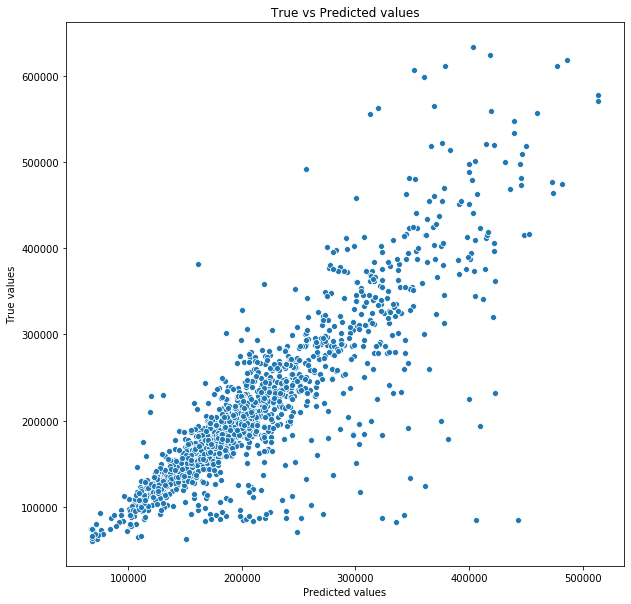

In [72]:
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

plt.figure(figsize = (10,10)) 
sns.scatterplot(x = y_pred_valid, y = y_valid.values[: , 0])

plt.xlabel('Predicted values')
plt.ylabel('True values')
plt.title('True vs Predicted values')
plt.show()

In [73]:
y_pred_test = model.predict(X_test)
y_pred_test

array([162286.00956658, 215024.81123055, 303944.71402032, ...,
       328193.98230127, 201366.58594395, 187179.86460732])

In [74]:
y_test['Price'] = y_pred_test
y_test.head()

,Id,Price
0,725,162286.009567
1,15856,215024.811231
2,5480,303944.714020
3,15664,354020.230328
4,14275,139233.726805


In [76]:
y_test.to_csv('C:/Temp/files/GeekBrains/ds_python_libs/final/new_params/larged.csv', index = False)